In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1, minNeighbors=5):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 6)              
 
 return len(faces),img_copy

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


picture shape: (4032, 3024, 3)


<function matplotlib.pyplot.show(*args, **kw)>

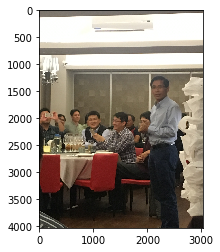

In [4]:
img = cv2.imread("./data/test5.jpg")
print("picture shape:",img.shape)
plt.imshow(convertToRGB(img))
plt.show

1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

In [5]:
# 讀入haar臉部分類器XML
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

共有幾張臉: 4


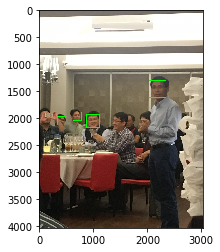

In [6]:
image_face = detect_faces(haar_face_cascade, img, scaleFactor=1.1, minNeighbors=5)
print("共有幾張臉:",image_face[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face[1]))

共有幾張臉: 5


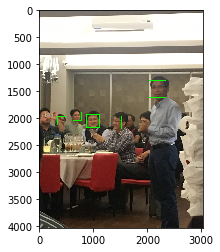

In [7]:
# 先調minNeighbors = 3 (default)
image_face = detect_faces(haar_face_cascade, img, scaleFactor=1.1, minNeighbors=3)
print("共有幾張臉:",image_face[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face[1]))

共有幾張臉: 6


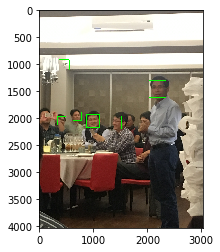

In [8]:
# 先調minNeighbors = 2 
image_face = detect_faces(haar_face_cascade, img, scaleFactor=1.1, minNeighbors=2)
print("共有幾張臉:",image_face[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face[1]))

共有幾張臉: 5


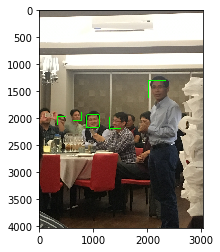

In [9]:
# scaleFactor=1.023
image_face = detect_faces(haar_face_cascade, img, scaleFactor=1.023, minNeighbors=10)
print("共有幾張臉:",image_face[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face[1]))

共有幾張臉: 9


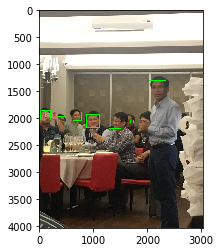

In [10]:
# scaleFactor=1.02
image_face = detect_faces(haar_face_cascade, img, scaleFactor=1.02, minNeighbors=7)
print("共有幾張臉:",image_face[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face[1]))

> 調參心得:
- minNeighbors 越多會確認越多次，所以會辨認出的會比較精準
- scaleFactor >1 但越小會掃得越細，時間花比較久

HW3.load cascade classifier training file for lbpcascade 

In [11]:
# 讀入lbp臉部分類器XML
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

共有幾張臉: 5


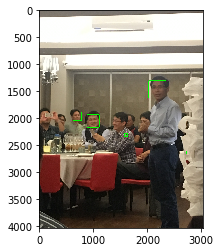

In [12]:
image_face_lbp = detect_faces(lbp_face_cascade, img, scaleFactor=1.1, minNeighbors=5)
print("共有幾張臉:",image_face_lbp[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face_lbp[1]))

共有幾張臉: 12


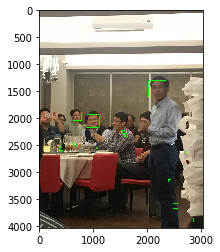

In [13]:
image_face_lbp = detect_faces(lbp_face_cascade, img, scaleFactor=1.1, minNeighbors=3)
print("共有幾張臉:",image_face_lbp[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face_lbp[1]))

共有幾張臉: 3


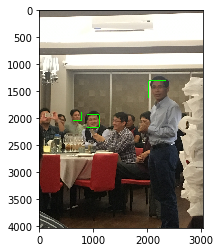

In [14]:
image_face_lbp = detect_faces(lbp_face_cascade, img, scaleFactor=1.1, minNeighbors=10)
print("共有幾張臉:",image_face_lbp[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face_lbp[1]))

共有幾張臉: 5


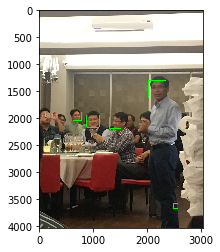

In [15]:
image_face_lbp = detect_faces(lbp_face_cascade, img, scaleFactor=1.05, minNeighbors=10)
print("共有幾張臉:",image_face_lbp[0])
#convert image to RGB and show image 
plt.imshow(convertToRGB(image_face_lbp[1]))

> 心得: LBP似乎沒有HAAR準確，會有比較多誤判